#### Load Dataset & Inspection

In [1]:
import pandas as pd

file_path = './diabetes_data_upload.csv'
df = pd.read_csv(file_path)
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [2]:
print(f"The dataset contains {df.shape[0]} rows and {df.shape[1]} columns.\n")
print("Dataset Information:\n")
df.dtypes

The dataset contains 520 rows and 17 columns.

Dataset Information:



Age                    int64
Gender                object
Polyuria              object
Polydipsia            object
sudden weight loss    object
weakness              object
Polyphagia            object
Genital thrush        object
visual blurring       object
Itching               object
Irritability          object
delayed healing       object
partial paresis       object
muscle stiffness      object
Alopecia              object
Obesity               object
class                 object
dtype: object

In [3]:
missing_values = df.isnull().sum()
print("Missing Values in Each Column:")
missing_values


Missing Values in Each Column:


Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [4]:
print("Statistical Summary of the Dataset:")
df.describe(include='all')

Statistical Summary of the Dataset:


,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
count,520.000000,520,520,520,520,520,520,520,520,520,520,520,520,520,520,520,520
unique,NaN,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,NaN,Male,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,Positive
freq,NaN,328,262,287,303,305,283,404,287,267,394,281,296,325,341,432,320
mean,48.028846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,12.151466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,16.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,39.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,47.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,57.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


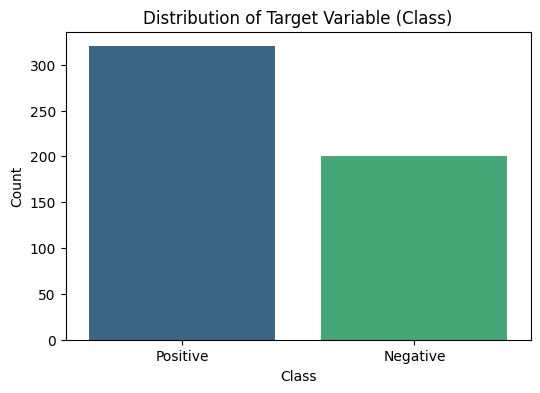

Class Distribution:


class
Positive    320
Negative    200
Name: count, dtype: int64

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

class_counts = df['class'].value_counts()

plt.figure(figsize=(6, 4))
sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis", hue=class_counts.index, legend=False)
plt.title("Distribution of Target Variable (Class)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

print("Class Distribution:")
class_counts


#### Encoding

In [6]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = label_encoder.fit_transform(df[column])

print("Dataset after encoding categorical features:")
df.head()

Dataset after encoding categorical features:


,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


#### Checking for Feature Correlations

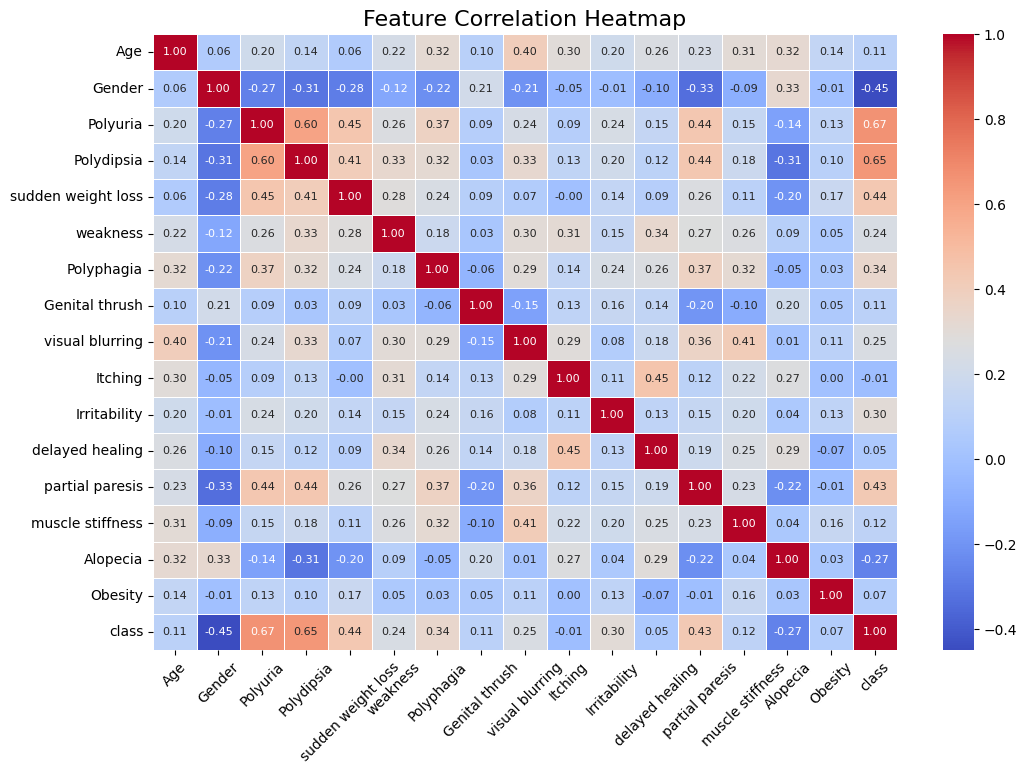

Correlation of Features with Target Variable (Class):



class                 1.000000
Polyuria              0.665922
Polydipsia            0.648734
sudden weight loss    0.436568
partial paresis       0.432288
Polyphagia            0.342504
Irritability          0.299467
visual blurring       0.251300
weakness              0.243275
muscle stiffness      0.122474
Genital thrush        0.110288
Age                   0.108679
Obesity               0.072173
delayed healing       0.046980
Itching              -0.013384
Alopecia             -0.267512
Gender               -0.449233
Name: class, dtype: float64

In [7]:
correlation_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    linewidths=0.5,
    annot_kws={"size": 8}
)
plt.title('Feature Correlation Heatmap', fontsize=16)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.show()

target_corr = correlation_matrix['class'].sort_values(ascending=False)
print("Correlation of Features with Target Variable (Class):\n")
target_corr


#### Feature Selection

In [8]:
correlation_threshold = 0.1
significant_features = target_corr[abs(target_corr) > correlation_threshold].index.tolist()

print(f"Significant features based on correlation threshold ({correlation_threshold}):")
print(significant_features)

# Drop features below treshold
refined_df = df[significant_features]
print(f"\nDataset reduced to {len(refined_df.columns)} features after refinement.\n")
refined_df.head()

Significant features based on correlation threshold (0.1):
['class', 'Polyuria', 'Polydipsia', 'sudden weight loss', 'partial paresis', 'Polyphagia', 'Irritability', 'visual blurring', 'weakness', 'muscle stiffness', 'Genital thrush', 'Age', 'Alopecia', 'Gender']

Dataset reduced to 14 features after refinement.



,class,Polyuria,Polydipsia,sudden weight loss,partial paresis,Polyphagia,Irritability,visual blurring,weakness,muscle stiffness,Genital thrush,Age,Alopecia,Gender
0,1,0,1,0,0,0,0,0,1,1,0,40,1,1
1,1,0,0,0,1,0,0,1,1,0,0,58,1,1
2,1,1,0,0,0,1,0,0,1,1,0,41,1,1
3,1,0,0,1,0,1,0,0,1,0,1,45,0,1
4,1,1,1,1,1,1,1,1,1,1,0,60,1,1


#### Train-Test Split

In [9]:
from sklearn.model_selection import train_test_split

X = refined_df.drop(columns=['class'])
y = refined_df['class']

# 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Shape of training features (X_train):", X_train.shape)
print("Shape of testing features (X_test):", X_test.shape)
print("Shape of training target (y_train):", y_train.shape)
print("Shape of testing target (y_test):", y_test.shape)


Shape of training features (X_train): (416, 13)
Shape of testing features (X_test): (104, 13)
Shape of training target (y_train): (416,)
Shape of testing target (y_test): (104,)


Class distribution in training set:
 class
1    0.615385
0    0.384615
Name: proportion, dtype: float64

Class distribution in testing set:
 class
1    0.615385
0    0.384615
Name: proportion, dtype: float64


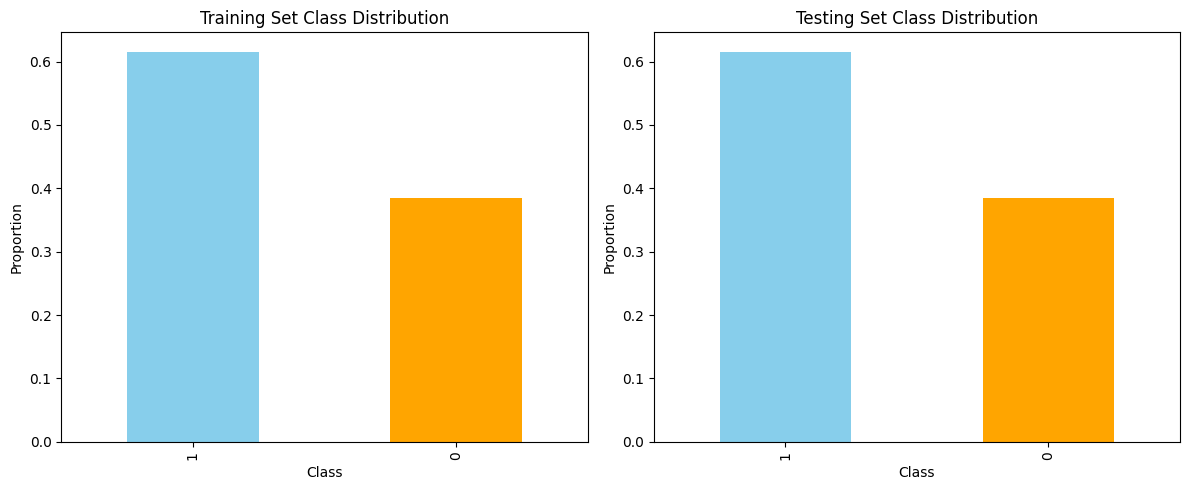

In [10]:
import matplotlib.pyplot as plt

train_class_distribution = y_train.value_counts(normalize=True)
print("Class distribution in training set:\n", train_class_distribution)

test_class_distribution = y_test.value_counts(normalize=True)
print("\nClass distribution in testing set:\n", test_class_distribution)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
train_class_distribution.plot(kind='bar', ax=axes[0], title='Training Set Class Distribution', color=['skyblue', 'orange'])
test_class_distribution.plot(kind='bar', ax=axes[1], title='Testing Set Class Distribution', color=['skyblue', 'orange'])

for ax in axes:
    ax.set_xlabel("Class")
    ax.set_ylabel("Proportion")
plt.tight_layout()
plt.show()

#### Data Scaling

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)

print("Scaled Training Data:")
X_train_scaled_df.head()

Scaled Training Data:


,Polyuria,Polydipsia,sudden weight loss,partial paresis,Polyphagia,Irritability,visual blurring,weakness,muscle stiffness,Genital thrush,Age,Alopecia,Gender
0,1.009662,-0.886232,1.162017,1.145038,-0.925820,-0.540301,1.101257,0.818952,1.297641,1.838191,0.992843,-0.712212,-1.304338
1,1.009662,1.128372,1.162017,1.145038,1.080123,-0.540301,1.101257,0.818952,1.297641,1.838191,3.055071,-0.712212,0.766672
2,1.009662,1.128372,1.162017,-0.873334,1.080123,-0.540301,-0.908054,-1.221072,-0.770629,1.838191,0.002974,-0.712212,0.766672
3,1.009662,1.128372,1.162017,-0.873334,1.080123,1.850819,1.101257,0.818952,-0.770629,1.838191,-0.574449,-0.712212,0.766672
4,-0.990430,-0.886232,-0.860573,-0.873334,1.080123,-0.540301,1.101257,-1.221072,1.297641,-0.544013,0.745376,-0.712212,0.766672


In [12]:
print("Scaled Testing Data:")
X_test_scaled_df.head()

Scaled Testing Data:


,Polyuria,Polydipsia,sudden weight loss,partial paresis,Polyphagia,Irritability,visual blurring,weakness,muscle stiffness,Genital thrush,Age,Alopecia,Gender
0,-0.990430,-0.886232,-0.860573,-0.873334,-0.925820,-0.540301,1.101257,0.818952,-0.770629,-0.544013,0.167953,1.404076,-1.304338
1,-0.990430,1.128372,-0.860573,-0.873334,-0.925820,1.850819,-0.908054,0.818952,-0.770629,1.838191,0.580398,1.404076,0.766672
2,1.009662,1.128372,-0.860573,1.145038,1.080123,1.850819,-0.908054,0.818952,1.297641,1.838191,1.570267,-0.712212,0.766672
3,-0.990430,-0.886232,-0.860573,-0.873334,1.080123,-0.540301,-0.908054,-1.221072,-0.770629,1.838191,-0.244493,-0.712212,0.766672
4,-0.990430,-0.886232,-0.860573,-0.873334,-0.925820,-0.540301,-0.908054,-1.221072,-0.770629,-0.544013,-0.904406,-0.712212,0.766672


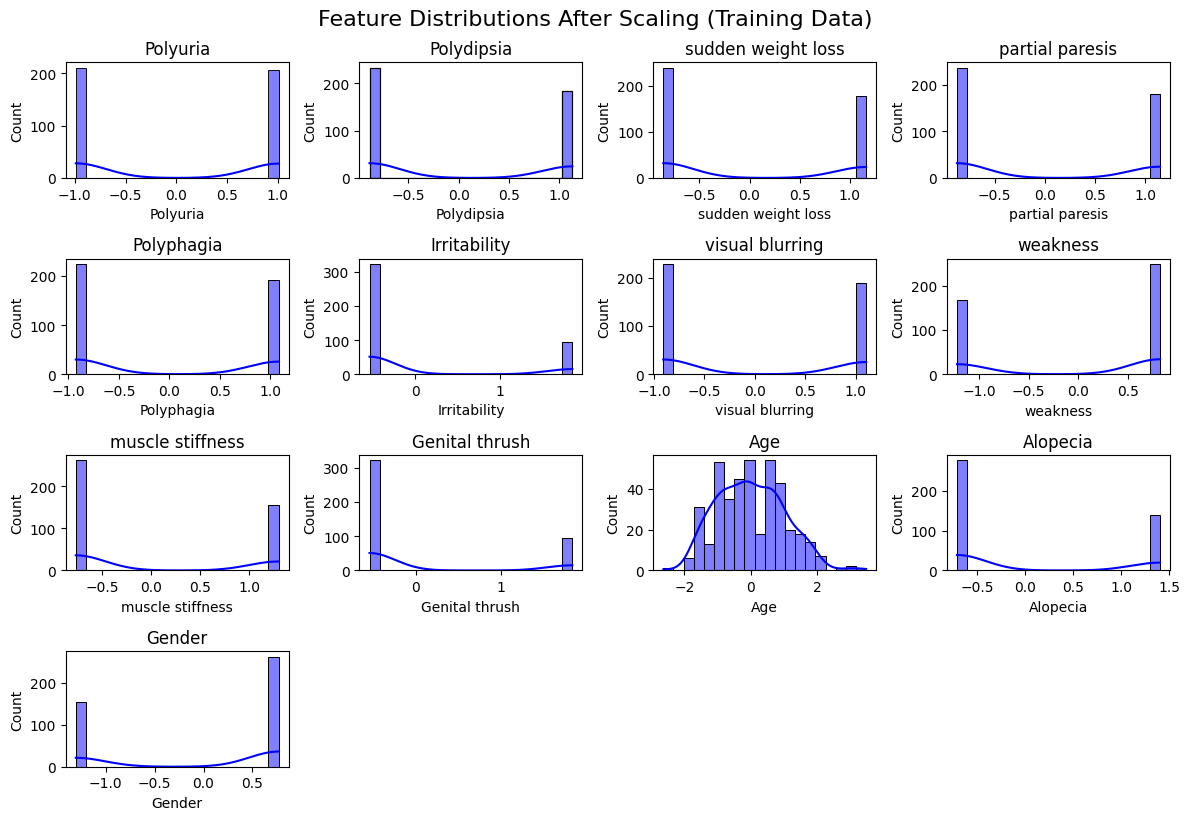

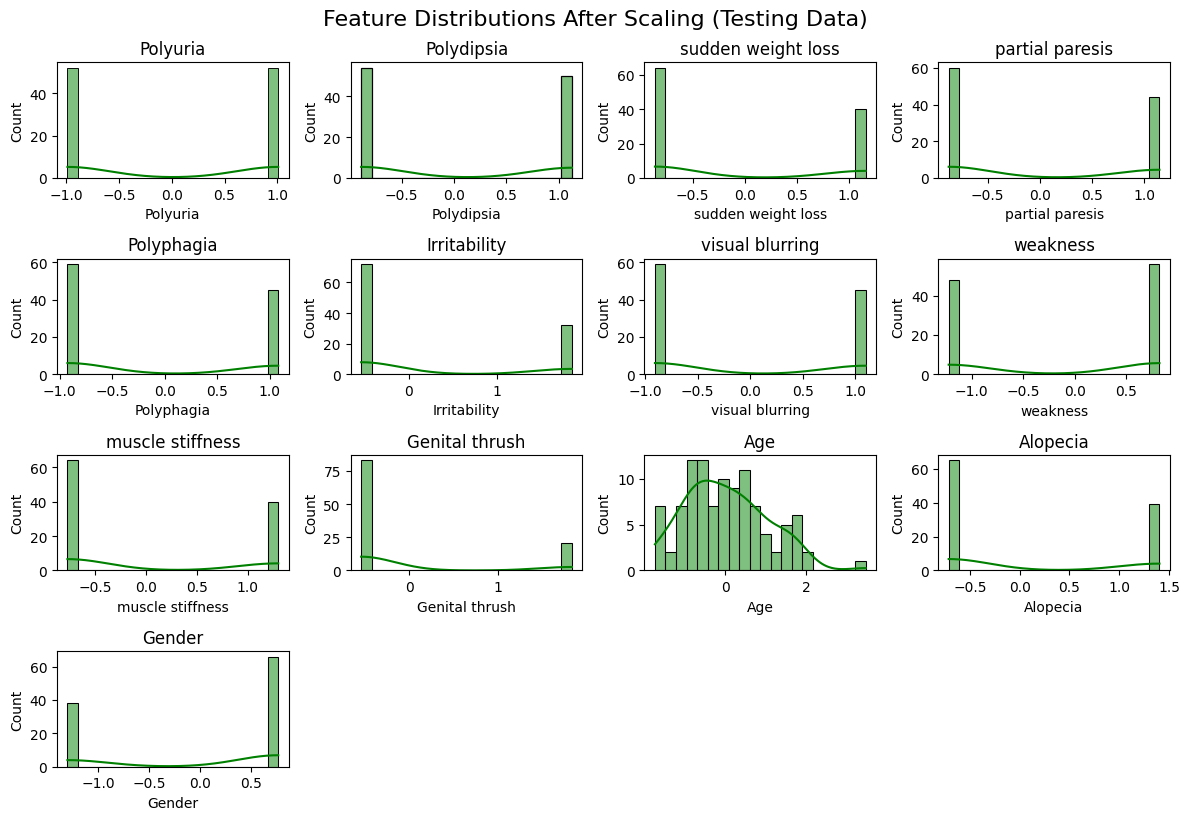

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
for i, column in enumerate(X_train_scaled_df.columns):
    plt.subplot(4, 4, i + 1)
    sns.histplot(X_train_scaled_df[column], kde=True, bins=20, color="blue", label="Train")
    plt.title(column)
    plt.tight_layout()

plt.suptitle("Feature Distributions After Scaling (Training Data)", y=1.02, fontsize=16)
plt.show()

plt.figure(figsize=(12, 8))
for i, column in enumerate(X_test_scaled_df.columns):
    plt.subplot(4, 4, i + 1)
    sns.histplot(X_test_scaled_df[column], kde=True, bins=20, color="green", label="Test")
    plt.title(column)
    plt.tight_layout()

plt.suptitle("Feature Distributions After Scaling (Testing Data)", y=1.02, fontsize=16)
plt.show()

#### Train-Validate Split

In [14]:
X_train_final, X_val, y_train_final, y_val = train_test_split(
    X_train_scaled, y_train, test_size=0.2, random_state=42, stratify=y_train
)

print(f"Training Set Shape: {X_train_final.shape}, {y_train_final.shape}")
print(f"Validation Set Shape: {X_val.shape}, {y_val.shape}")
print(f"Testing Set Shape (unchanged): {X_test_scaled.shape}, {y_test.shape}")

Training Set Shape: (332, 13), (332,)
Validation Set Shape: (84, 13), (84,)
Testing Set Shape (unchanged): (104, 13), (104,)


#### Model Training

##### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

feature_names = X.columns.tolist()
X_train_final = pd.DataFrame(X_train_final, columns=feature_names)
X_val = pd.DataFrame(X_val, columns=feature_names)

log_reg_model = LogisticRegression(random_state=42, max_iter=500)

log_reg_model.fit(X_train_final, y_train_final)

y_train_pred = log_reg_model.predict(X_train_final)
y_val_pred = log_reg_model.predict(X_val)

train_accuracy = log_reg_model.score(X_train_final, y_train_final)
val_accuracy = log_reg_model.score(X_val, y_val)

val_auc = roc_auc_score(y_val, log_reg_model.predict_proba(X_val)[:, 1])

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Validation AUC: {val_auc:.4f}")

print("\nClassification Report (Validation):")
print(classification_report(y_val, y_val_pred))

Training Accuracy: 0.9277
Validation Accuracy: 0.8810
Validation AUC: 0.9351

Classification Report (Validation):
              precision    recall  f1-score   support

           0       0.84      0.84      0.84        32
           1       0.90      0.90      0.90        52

    accuracy                           0.88        84
   macro avg       0.87      0.87      0.87        84
weighted avg       0.88      0.88      0.88        84



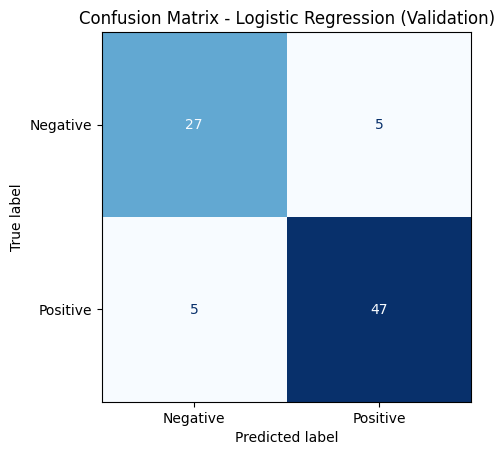

In [16]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(
    log_reg_model, X_val, y_val, display_labels=['Negative', 'Positive'], cmap='Blues', colorbar=False
)
plt.title("Confusion Matrix - Logistic Regression (Validation)")
plt.show()

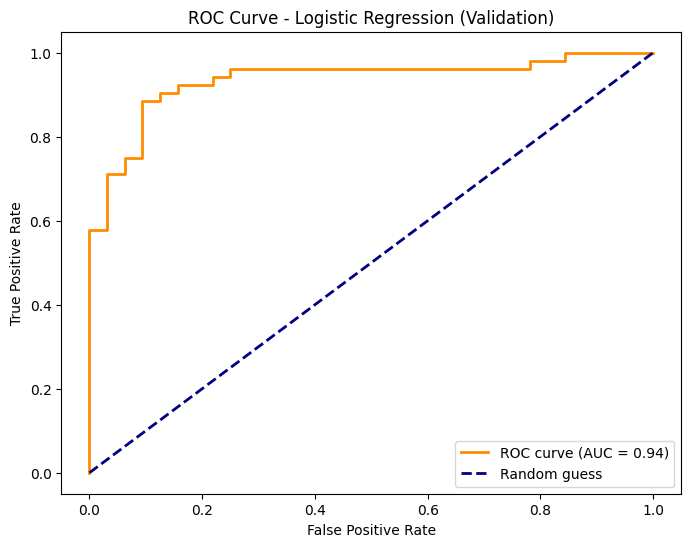

In [17]:
from sklearn.metrics import roc_curve, auc

y_val_proba = log_reg_model.predict_proba(X_val)[:, 1]
fpr, tpr, thresholds = roc_curve(y_val, y_val_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label="Random guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression (Validation)")
plt.legend(loc="lower right")
plt.show()

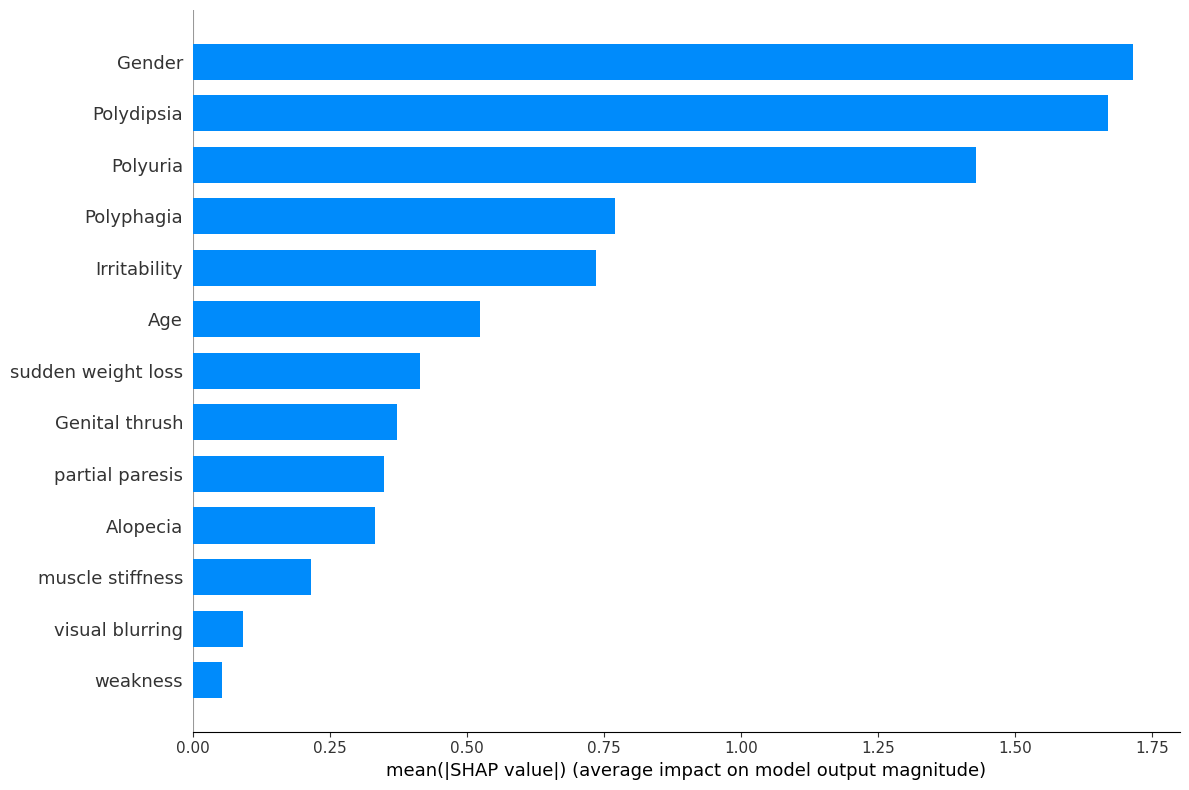

In [18]:
import shap

explainer = shap.Explainer(log_reg_model, X_val)
shap_values = explainer(X_val)
shap.summary_plot(shap_values, X_val, feature_names=feature_names, plot_type="bar", plot_size=(12, 8))

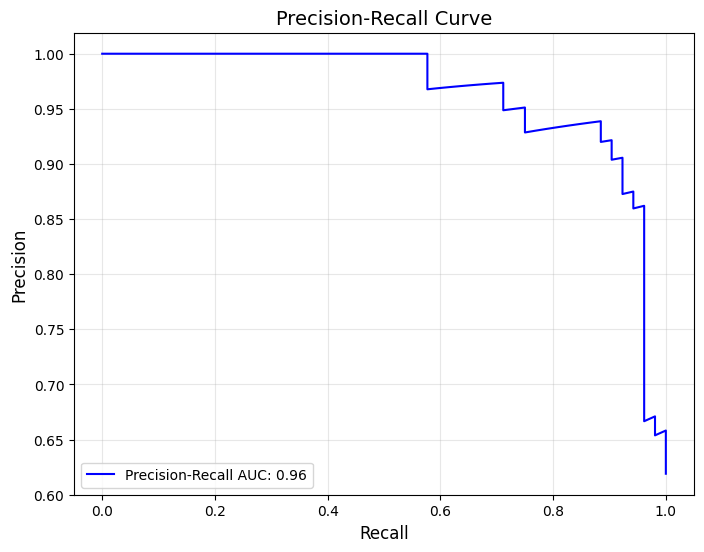

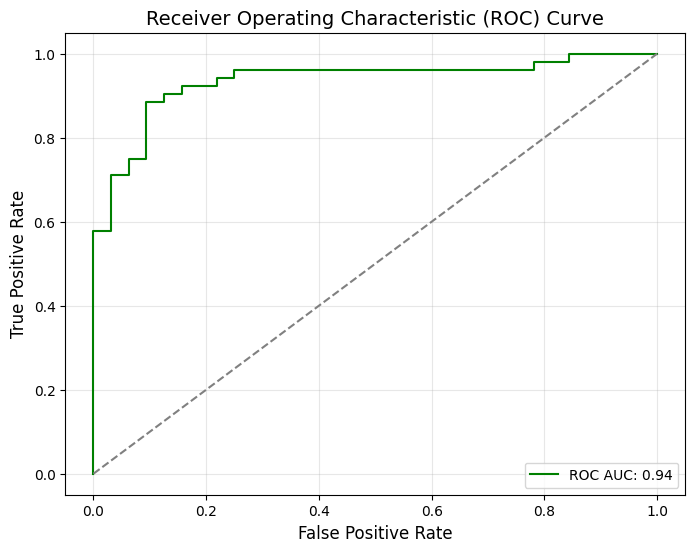

In [19]:
from sklearn.metrics import precision_recall_curve, roc_curve, auc

y_pred_proba = log_reg_model.predict_proba(X_val)

precision, recall, _ = precision_recall_curve(y_val, y_pred_proba[:, 1])

fpr, tpr, _ = roc_curve(y_val, y_pred_proba[:, 1])

pr_auc = auc(recall, precision)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Precision-Recall AUC: {pr_auc:.2f}', color='blue')
plt.title("Precision-Recall Curve", fontsize=14)
plt.xlabel("Recall", fontsize=12)
plt.ylabel("Precision", fontsize=12)
plt.legend(loc="lower left")
plt.grid(alpha=0.3)
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC AUC: {roc_auc:.2f}', color='green')
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  # Diagonal line
plt.title("Receiver Operating Characteristic (ROC) Curve", fontsize=14)
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()


##### Random Forest

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

rf_params = {
    "n_estimators": 100,
    "max_depth": 10,
    "min_samples_split": 5,
    "min_samples_leaf": 2,
    "max_features": "sqrt",
    "random_state": 42
}

X_train = pd.DataFrame(X_train, columns=feature_names)
X_val = pd.DataFrame(X_val, columns=feature_names)

baseline_rf = RandomForestClassifier(**rf_params)
baseline_rf.fit(X_train, y_train)

y_train_pred = baseline_rf.predict(X_train)
y_val_pred = baseline_rf.predict(X_val)

train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)

print(f"Random Forest Training Accuracy: {train_accuracy:.4f}")
print(f"Random Forest Validation Accuracy: {val_accuracy:.4f}")

Random Forest Training Accuracy: 0.9904
Random Forest Validation Accuracy: 0.9286


Training Set Classification Report:

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       160
           1       0.99      1.00      0.99       256

    accuracy                           0.99       416
   macro avg       0.99      0.99      0.99       416
weighted avg       0.99      0.99      0.99       416

Validation Set Classification Report:

              precision    recall  f1-score   support

           0       0.86      0.97      0.91        32
           1       0.98      0.90      0.94        52

    accuracy                           0.93        84
   macro avg       0.92      0.94      0.93        84
weighted avg       0.93      0.93      0.93        84



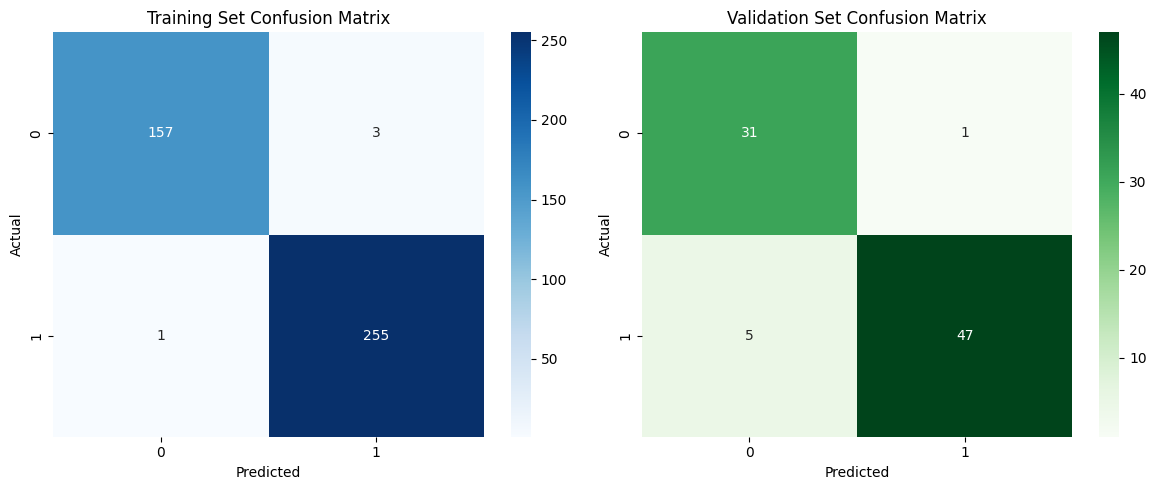

In [21]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

print("Training Set Classification Report:\n")
print(classification_report(y_train, y_train_pred))

print("Validation Set Classification Report:\n")
print(classification_report(y_val, y_val_pred))

train_conf_matrix = confusion_matrix(y_train, y_train_pred)
val_conf_matrix = confusion_matrix(y_val, y_val_pred)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(train_conf_matrix, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title("Training Set Confusion Matrix")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(val_conf_matrix, annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title("Validation Set Confusion Matrix")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()

Feature Importances:

               Feature  Importance
0             Polyuria    0.224709
1           Polydipsia    0.215733
12              Gender    0.123742
10                 Age    0.118823
2   sudden weight loss    0.053762
3      partial paresis    0.049628
5         Irritability    0.043407
4           Polyphagia    0.040738
11            Alopecia    0.035960
6      visual blurring    0.029111
7             weakness    0.023896
8     muscle stiffness    0.020841
9       Genital thrush    0.019651


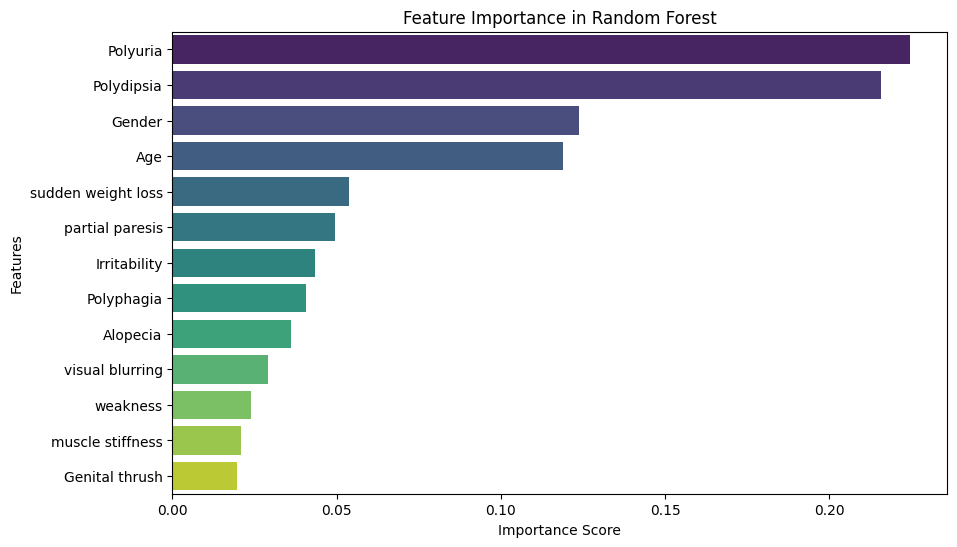

In [22]:
feature_importances = baseline_rf.feature_importances_

feature_importance_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": feature_importances
}).sort_values(by="Importance", ascending=False)

print("Feature Importances:\n")
print(feature_importance_df)

plt.figure(figsize=(10, 6))
sns.barplot(
    x="Importance",
    y="Feature",
    data=feature_importance_df,
    palette="viridis",
    hue="Feature",
    legend=False
)
plt.title("Feature Importance in Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


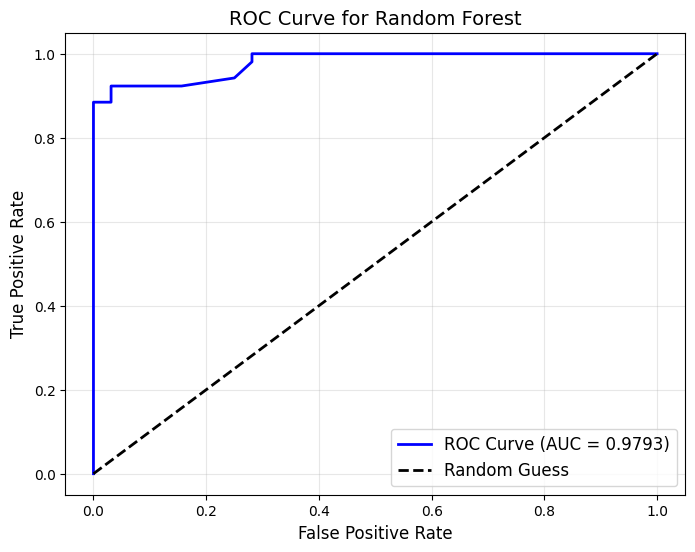

Random Forest ROC AUC: 0.9793


In [23]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_val_proba = baseline_rf.predict_proba(X_val)[:, 1]

fpr, tpr, thresholds = roc_curve(y_val, y_val_proba)
roc_auc = roc_auc_score(y_val, y_val_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.4f})", color="blue", linewidth=2)
plt.plot([0, 1], [0, 1], "k--", label="Random Guess", linewidth=2)
plt.title("ROC Curve for Random Forest", fontsize=14)
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.legend(loc="lower right", fontsize=12)
plt.grid(alpha=0.3)
plt.show()

print(f"Random Forest ROC AUC: {roc_auc:.4f}")

##### SVM (Support Vector Machine)

In [24]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

X_train = pd.DataFrame(X_train, columns=feature_names)
X_val = pd.DataFrame(X_val, columns=feature_names)

svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train, y_train)

y_train_pred = svm_model.predict(X_train)
y_val_pred = svm_model.predict(X_val)

train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)

print(f"SVM Training Accuracy: {train_accuracy:.4f}")
print(f"SVM Validation Accuracy: {val_accuracy:.4f}")

SVM Training Accuracy: 0.6154
SVM Validation Accuracy: 0.6190


  0%|          | 0/50 [00:00<?, ?it/s]

SHAP values computed.


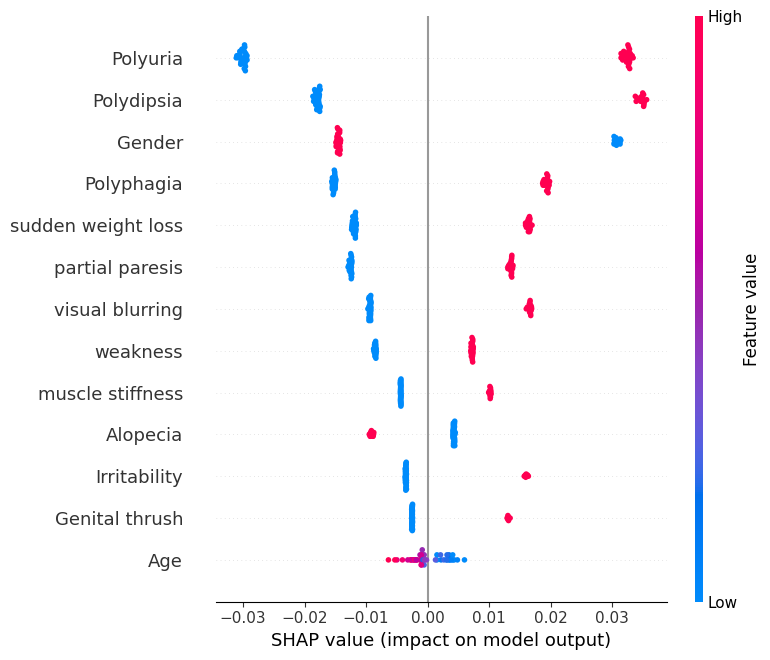

In [25]:
import shap
import pandas as pd

X_val_df = pd.DataFrame(X_val, columns=feature_names)
y_val_series = pd.Series(y_val, index=X_val_df.index)

X_val_sampled = X_val_df.sample(50, random_state=42)
y_val_sampled = y_val_series.loc[X_val_sampled.index]

explainer = shap.KernelExplainer(svm_model.decision_function, X_val_sampled)
shap_values = explainer.shap_values(X_val_sampled)

print("SHAP values computed.")
shap.summary_plot(shap_values, X_val_sampled, feature_names=feature_names)

Confusion Matrix:
[[ 0 32]
 [ 0 52]]

Classification Report:
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00        32
    Positive       0.62      1.00      0.76        52

    accuracy                           0.62        84
   macro avg       0.31      0.50      0.38        84
weighted avg       0.38      0.62      0.47        84



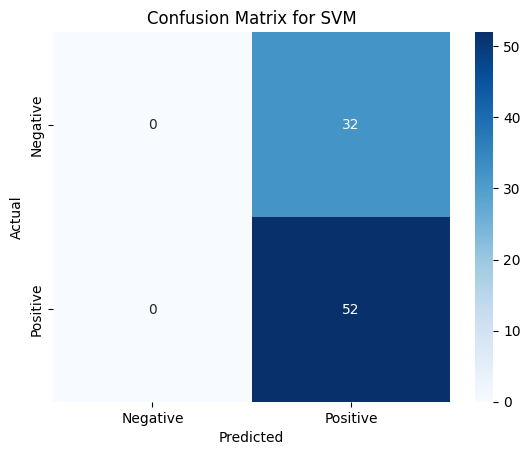

In [26]:
from sklearn.metrics import confusion_matrix, classification_report

y_val_pred = svm_model.predict(X_val)

conf_matrix = confusion_matrix(y_val, y_val_pred)
print("Confusion Matrix:")
print(conf_matrix)

class_report = classification_report(y_val, y_val_pred, target_names=["Negative", "Positive"], zero_division=0)
print("\nClassification Report:")
print(class_report)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for SVM")
plt.show()


ROC AUC: 0.9435


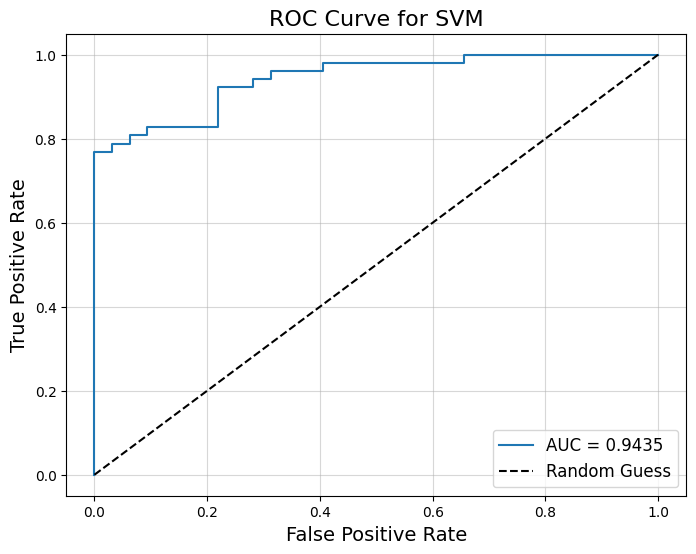

In [27]:
from sklearn.metrics import roc_curve, roc_auc_score

y_val_scores = svm_model.decision_function(X_val)

fpr, tpr, thresholds = roc_curve(y_val, y_val_scores)

roc_auc = roc_auc_score(y_val, y_val_scores)
print(f"ROC AUC: {roc_auc:.4f}")

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.4f}")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.title("ROC Curve for SVM", fontsize=16)
plt.xlabel("False Positive Rate", fontsize=14)
plt.ylabel("True Positive Rate", fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.5)
plt.show()


##### Gradient Boosting

In [28]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

gb_model = XGBClassifier(
    random_state=42,
    eval_metric='logloss',
    max_depth=4,
    learning_rate=0.1,
    n_estimators=100,
    min_child_weight=1,
    subsample=0.8
)

gb_model.fit(X_train, y_train)

y_train_pred = gb_model.predict(X_train)
y_val_pred = gb_model.predict(X_val)

train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)

print(f"Tuned Gradient Boosting Training Accuracy: {train_accuracy:.4f}")
print(f"Tuned Gradient Boosting Validation Accuracy: {val_accuracy:.4f}")


Tuned Gradient Boosting Training Accuracy: 0.9928
Tuned Gradient Boosting Validation Accuracy: 0.8333


<Figure size 1000x600 with 0 Axes>

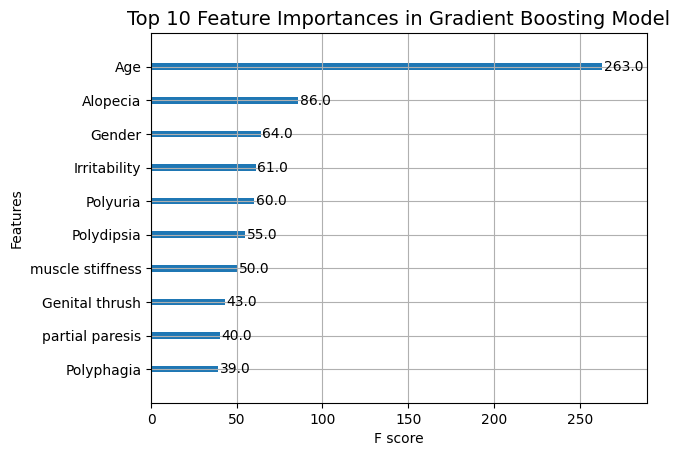

In [29]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plot_importance(gb_model, importance_type='weight', max_num_features=10)
plt.title("Top 10 Feature Importances in Gradient Boosting Model", fontsize=14)
plt.show()


Confusion Matrix:
[[22 10]
 [ 4 48]]

Classification Report:
              precision    recall  f1-score   support

    Negative       0.85      0.69      0.76        32
    Positive       0.83      0.92      0.87        52

    accuracy                           0.83        84
   macro avg       0.84      0.81      0.82        84
weighted avg       0.83      0.83      0.83        84



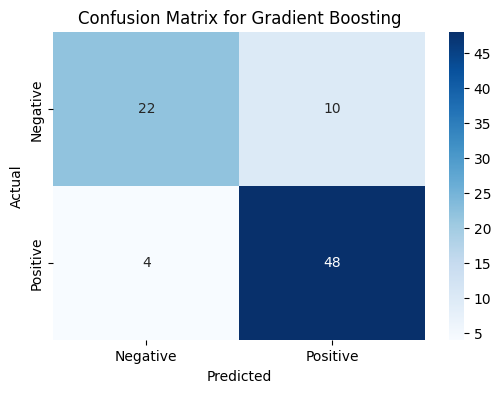

In [30]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

conf_matrix = confusion_matrix(y_val, y_val_pred)
print("Confusion Matrix:")
print(conf_matrix)

class_report = classification_report(y_val, y_val_pred, target_names=["Negative", "Positive"])
print("\nClassification Report:")
print(class_report)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Gradient Boosting")
plt.show()

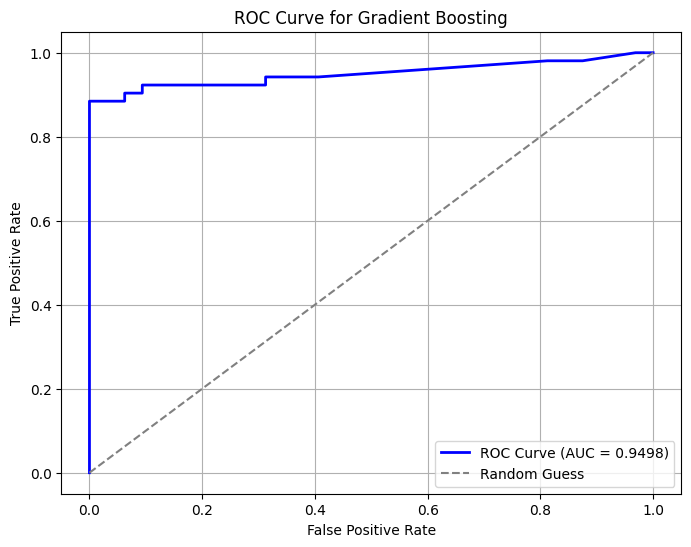

In [31]:
from sklearn.metrics import roc_curve, auc

y_val_proba = gb_model.predict_proba(X_val)[:, 1]
fpr, tpr, thresholds = roc_curve(y_val, y_val_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Gradient Boosting')
plt.legend(loc='lower right')
plt.grid()
plt.show()

##### Neural Network

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

model = Sequential([
    Dense(16, activation='relu', input_dim=X_train_scaled.shape[1]),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss=BinaryCrossentropy(),
              metrics=['accuracy'])

history = model.fit(
    X_train_scaled, y_train,
    validation_data=(X_test_scaled, y_test),
    epochs=50,
    batch_size=16,
    verbose=1
)

print("Baseline neural network training complete.")


Epoch 1/50


/Users/riccardodemaria/Library/Caches/pypoetry/virtualenvs/diabetes-c96INhTS-py3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4011 - loss: 0.8140 - val_accuracy: 0.5769 - val_loss: 0.7105
Epoch 2/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 952us/step - accuracy: 0.5335 - loss: 0.7060 - val_accuracy: 0.7596 - val_loss: 0.6383
Epoch 3/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 865us/step - accuracy: 0.7214 - loss: 0.6537 - val_accuracy: 0.8269 - val_loss: 0.5854
Epoch 4/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 996us/step - accuracy: 0.7741 - loss: 0.6007 - val_accuracy: 0.8654 - val_loss: 0.5378
Epoch 5/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 926us/step - accuracy: 0.8172 - loss: 0.5566 - val_accuracy: 0.8654 - val_loss: 0.4914
Epoch 6/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 861us/step - accuracy: 0.7913 - loss: 0.5241 - val_accuracy: 0.8750 - val_loss: 0.4445
Epoch 7/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 949us/step - accuracy: 0.8185 - loss: 0.4850 - val_accuracy: 0.9038 - val_loss: 0.3937
Epoch 8/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 844us/step - accuracy: 0.8346 - loss: 0.4351 - val_accuracy: 0.9231 - val_lo

In [33]:
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Neural Network Test Accuracy: {test_accuracy:.4f}")

Neural Network Test Accuracy: 0.9712


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Confusion Matrix:
[[38  2]
 [ 1 63]]

Classification Report:
              precision    recall  f1-score   support

    Negative       0.97      0.95      0.96        40
    Positive       0.97      0.98      0.98        64

    accuracy                           0.97       104
   macro avg       0.97      0.97      0.97       104
weighted avg       0.97      0.97      0.97       104



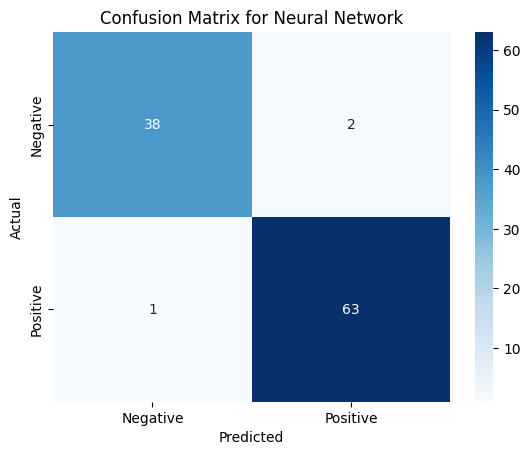

In [34]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

y_test_pred = (model.predict(X_test_scaled) > 0.5).astype("int32")

conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:")
print(conf_matrix)

class_report = classification_report(y_test, y_test_pred, target_names=["Negative", "Positive"])
print("\nClassification Report:")
print(class_report)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Neural Network")
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 671us/step


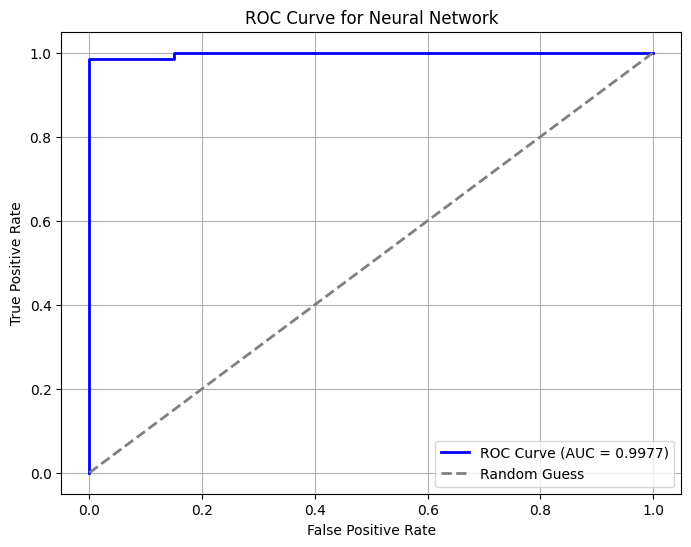

In [35]:
from sklearn.metrics import roc_curve, auc

y_test_pred_prob = model.predict(X_test_scaled).ravel()

fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f"ROC Curve (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Neural Network")
plt.legend(loc="lower right")
plt.grid()
plt.show()

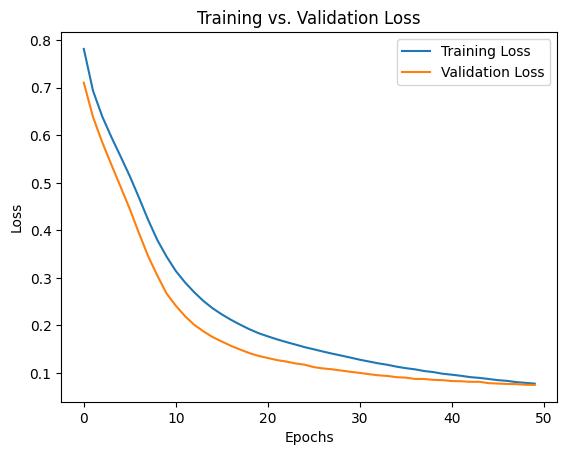

In [36]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs. Validation Loss')
plt.show()
